Based on the genres of each movie, define a function to get the cloud of words

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 100)

import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud


from io import StringIO

### import

In [2]:
# Import
path = "../data/"
file = "list of movies - dataset.csv"
file2 = "survey_ratings.csv"

movie_genres = pd.read_csv(path+file)[["imdbId", "genres"]]
survey_ratings = pd.read_csv(path+file2)[["userId", "imdbId", "rating"]]


In [3]:
# Collect a list of genres, out of the genres column in movie_genres
si=StringIO()
movie_genres["genres"].apply(lambda x: si.write(str(x)+","))
genres=si.getvalue()
si.close()

In [4]:
genres

'Crime,Drama,Thriller,Comedy,Crime,Drama,Comedy,Drama,Comedy,Drama,Romance,Biography,Crime,Drama,Drama,War,Horror,Mystery,Thriller,Drama,Drama,Fantasy,Horror,Comedy,Crime,Drama,Comedy,Drama,War,Comedy,Drama,Comedy,Fantasy,Music,Drama,Biography,Drama,Music,Action,Adventure,Sci-Fi,Adventure,Animation,Comedy,Drama,Music,Romance,Biography,Comedy,Drama,Action,Adventure,Sci-Fi,Biography,Crime,Drama,Action,Adventure,Animation,Fantasy,Horror,Mystery,Action,Adventure,Sci-Fi,Action,Drama,History,Action,Drama,Mystery,Horror,Mystery,Thriller,Adventure,Animation,Family,Adventure,Drama,Fantasy,Horror,Comedy,Crime,Drama,Drama,Romance,Drama,Horror,Mystery,Comedy,Drama,Action,Adventure,Comedy,Drama,Mystery,Sci-Fi,Comedy,Drama,Music,Drama,Biography,Drama,History,Drama,Thriller,Comedy,Drama,Comedy,Drama,Horror,Thriller,Biography,Drama,History,Adventure,Drama,Sci-Fi,Adventure,Animation,Comedy,Action,Adventure,Sci-Fi,Drama,Mystery,Sci-Fi,Action,Adventure,Biography,Biography,Crime,Drama,Animation,Comedy,Dra

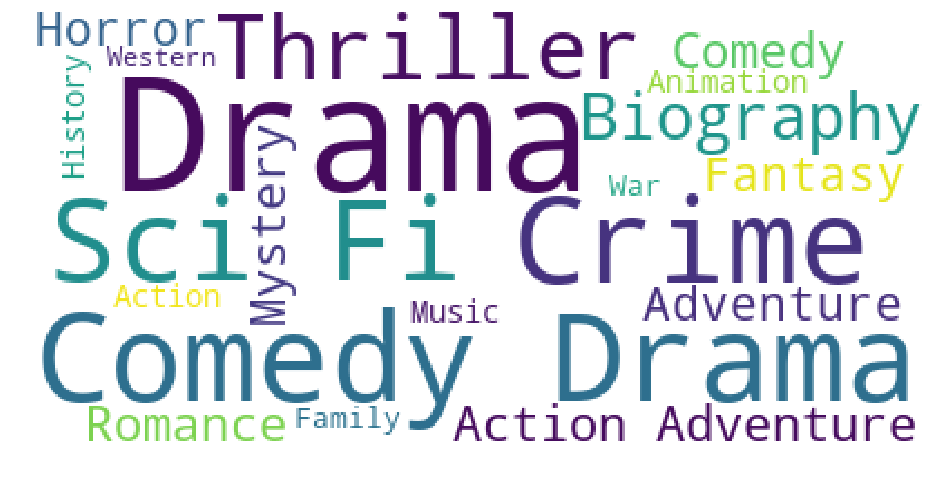

In [5]:
# Generate a word cloud image based on the string s
wordcloud = WordCloud().generate(genres)

# Display the generated image:
# take relative word frequencies into account, lower max_font_size
wordcloud = WordCloud(background_color="white",max_words=len(genres), relative_scaling=.1).generate(genres)
plt.figure(figsize=(16,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [6]:
# merge survey_ratings with movie_genres
# rating must be an integer to multiply the genres
rating_x_genres = (survey_ratings.merge(movie_genres, how="inner", left_on="imdbId", right_on="imdbId")
                                 .astype({"rating":"int32"}))

In [7]:
rating_x_genres

,userId,imdbId,rating,genres
0,Mano,7286456,5,"Crime,Drama,Thriller"
1,olivia,7286456,5,"Crime,Drama,Thriller"
2,Seno,7286456,4,"Crime,Drama,Thriller"
3,Sujit,7286456,4,"Crime,Drama,Thriller"
4,brecht,7286456,5,"Crime,Drama,Thriller"
...,...,...,...,...
1671,Wim Wenders,1285016,5,"Biography,Drama"
1672,Isabel,1285016,2,"Biography,Drama"
1673,Julie,1285016,3,"Biography,Drama"
1674,Tony Stark,1285016,3,"Biography,Drama"


In [8]:
sxi=StringIO()
rating_x_genres["genres"].apply(lambda x: sxi.write(str(x)+",")*rating_x_genres["rating"])
genres_x=sxi.getvalue()
sxi.close()

In [9]:
genres_x

'Crime,Drama,Thriller,Crime,Drama,Thriller,Crime,Drama,Thriller,Crime,Drama,Thriller,Crime,Drama,Thriller,Crime,Drama,Thriller,Crime,Drama,Thriller,Crime,Drama,Thriller,Crime,Drama,Thriller,Crime,Drama,Thriller,Crime,Drama,Thriller,Crime,Drama,Thriller,Crime,Drama,Thriller,Crime,Drama,Thriller,Crime,Drama,Thriller,Crime,Drama,Thriller,Crime,Drama,Thriller,Crime,Drama,Thriller,Crime,Drama,Thriller,Crime,Drama,Thriller,Crime,Drama,Thriller,Crime,Drama,Thriller,Crime,Drama,Thriller,Crime,Drama,Thriller,Crime,Drama,Thriller,Crime,Drama,Thriller,Crime,Drama,Thriller,Crime,Drama,Thriller,Crime,Drama,Thriller,Crime,Drama,Thriller,Comedy,Crime,Drama,Comedy,Crime,Drama,Comedy,Crime,Drama,Comedy,Crime,Drama,Comedy,Crime,Drama,Comedy,Crime,Drama,Comedy,Crime,Drama,Comedy,Crime,Drama,Comedy,Crime,Drama,Comedy,Crime,Drama,Comedy,Crime,Drama,Comedy,Crime,Drama,Comedy,Crime,Drama,Comedy,Crime,Drama,Comedy,Crime,Drama,Comedy,Crime,Drama,Comedy,Crime,Drama,Comedy,Crime,Drama,Comedy,Crime,Drama,Comedy,C

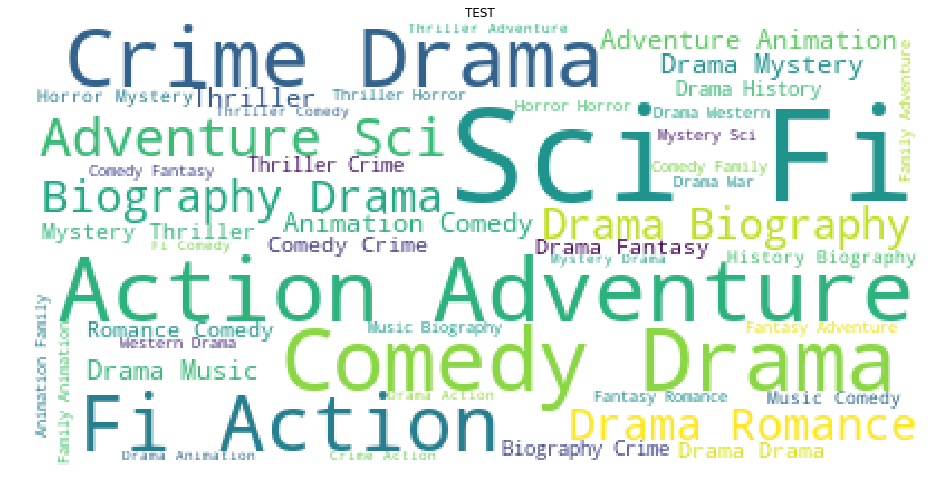

In [10]:
# Generate a word cloud image based on the string s
wordcloud = WordCloud().generate(genres_x)

# Display the generated image:
# take relative word frequencies into account, lower max_font_size
wordcloud = WordCloud(background_color="white",max_words=len(genres_x), relative_scaling=.1).generate(genres_x)
plt.figure(figsize=(16,9))
plt.title("TEST")
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


In [11]:
# create a list of users
users = list(rating_x_genres["userId"].unique())
users

['Mano',
 'olivia',
 'Seno',
 'Sujit',
 'brecht',
 'Can',
 'Valerie',
 'Adam Driver',
 'Alex',
 'me',
 'Max',
 'em',
 'Dani',
 'Pantareimadrid',
 'lea dicaprio',
 'Cuanina',
 'Alex Tester',
 'Carmen Maura',
 'Kosta',
 'Chespirito',
 'Marcel',
 'Flac',
 'Totoro',
 'John Sample',
 'Wim Wenders',
 'Isabel',
 'Julie',
 'Tony Stark',
 'Hilko',
 'Yoana',
 'Tessa',
 'June',
 'Mag',
 'yai',
 'Elsa',
 'Carstencito',
 'Unknown',
 'Mandy',
 'Tobias',
 'tove',
 'Arne']

In [12]:
# test to subset based on the position in the list of users
rating_x_genres[rating_x_genres["userId"].eq(users[0])]

,userId,imdbId,rating,genres
0,Mano,7286456,5,"Crime,Drama,Thriller"
321,Mano,1856101,4,"Action,Drama,Mystery"
479,Mano,1431045,5,"Action,Adventure,Comedy"
501,Mano,2543164,5,"Drama,Mystery,Sci-Fi"
636,Mano,3659388,5,"Adventure,Drama,Sci-Fi"
659,Mano,2096673,5,"Adventure,Animation,Comedy"
686,Mano,1392190,2,"Action,Adventure,Sci-Fi"
708,Mano,470752,5,"Drama,Mystery,Sci-Fi"
788,Mano,2488496,1,"Action,Adventure,Sci-Fi"
829,Mano,816692,4,"Adventure,Drama,Sci-Fi"


In [13]:
# function extracting string
def get_string(df):
    si=StringIO()
    df["genres"].apply(lambda x: si.write(str(x)+",")*df["rating"])
    list_genres=si.getvalue()
    si.close()
    return list_genres

In [14]:
get_string(rating_x_genres)

'Crime,Drama,Thriller,Crime,Drama,Thriller,Crime,Drama,Thriller,Crime,Drama,Thriller,Crime,Drama,Thriller,Crime,Drama,Thriller,Crime,Drama,Thriller,Crime,Drama,Thriller,Crime,Drama,Thriller,Crime,Drama,Thriller,Crime,Drama,Thriller,Crime,Drama,Thriller,Crime,Drama,Thriller,Crime,Drama,Thriller,Crime,Drama,Thriller,Crime,Drama,Thriller,Crime,Drama,Thriller,Crime,Drama,Thriller,Crime,Drama,Thriller,Crime,Drama,Thriller,Crime,Drama,Thriller,Crime,Drama,Thriller,Crime,Drama,Thriller,Crime,Drama,Thriller,Crime,Drama,Thriller,Crime,Drama,Thriller,Crime,Drama,Thriller,Crime,Drama,Thriller,Crime,Drama,Thriller,Crime,Drama,Thriller,Comedy,Crime,Drama,Comedy,Crime,Drama,Comedy,Crime,Drama,Comedy,Crime,Drama,Comedy,Crime,Drama,Comedy,Crime,Drama,Comedy,Crime,Drama,Comedy,Crime,Drama,Comedy,Crime,Drama,Comedy,Crime,Drama,Comedy,Crime,Drama,Comedy,Crime,Drama,Comedy,Crime,Drama,Comedy,Crime,Drama,Comedy,Crime,Drama,Comedy,Crime,Drama,Comedy,Crime,Drama,Comedy,Crime,Drama,Comedy,Crime,Drama,Comedy,C

In [15]:
# function to plotting the cloud of words
def plot_wordscloud(s, title):
    # Generate a word cloud image based on the string s
    wordcloud = WordCloud().generate(s)

    # Display the generated image:
    # take relative word frequencies into account, lower max_font_size
    wordcloud = WordCloud(background_color="white",max_words=len(s), relative_scaling=.1).generate(s)
    plt.figure(figsize=(5,3))
    plt.title(title)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

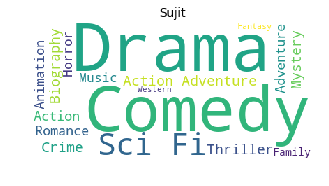

In [16]:
s = get_string(rating_x_genres[rating_x_genres["userId"].eq(users[3])])

plot_wordscloud(s, users[3])

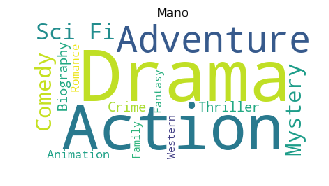

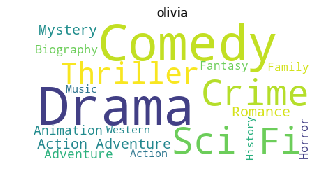

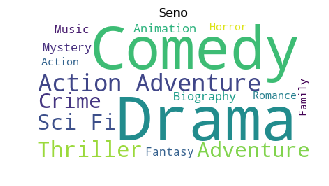

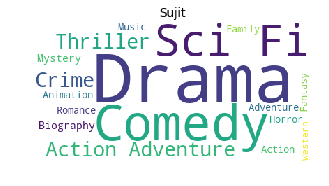

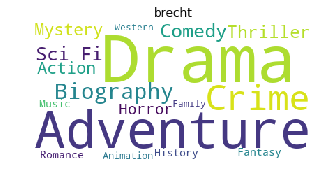

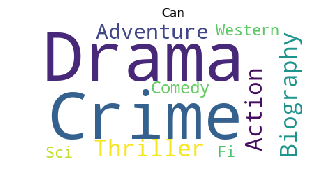

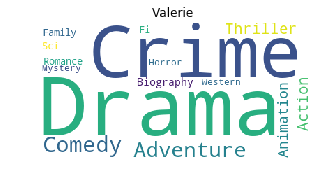

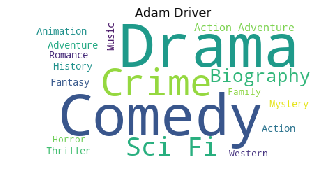

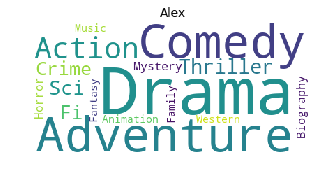

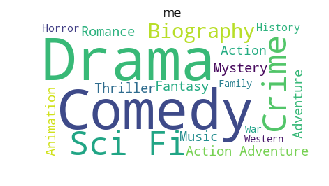

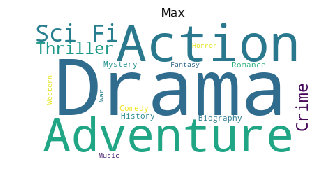

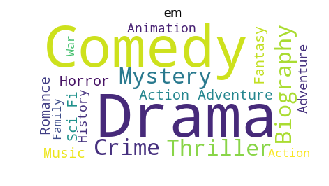

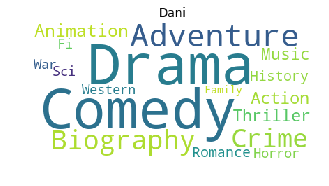

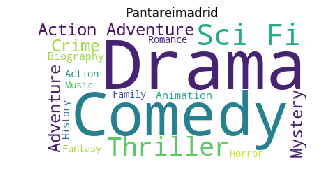

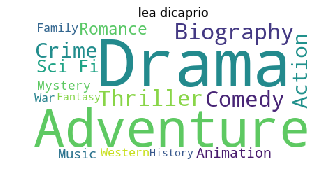

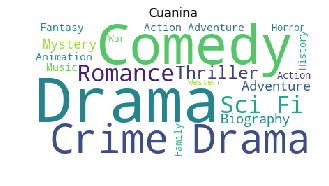

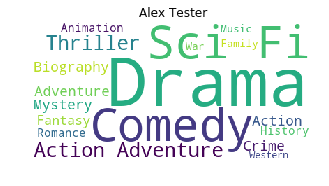

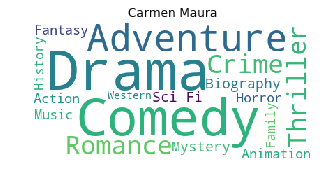

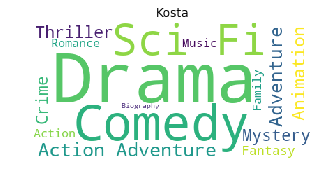

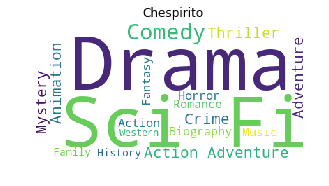

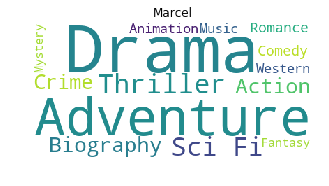

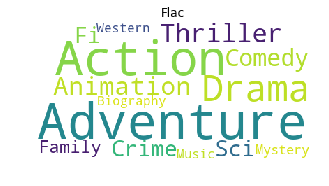

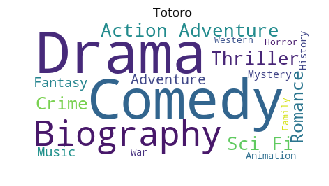

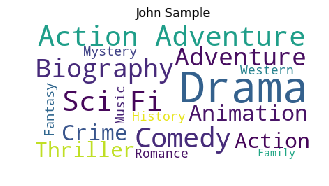

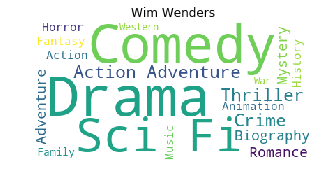

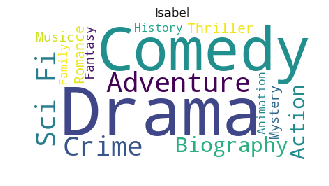

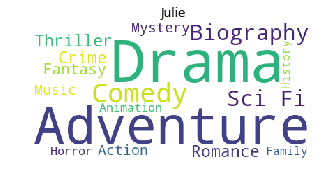

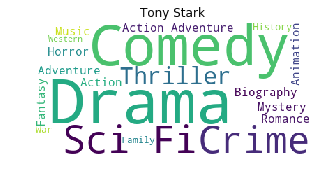

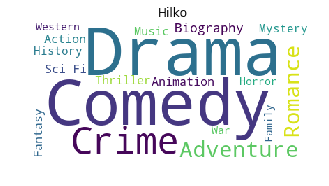

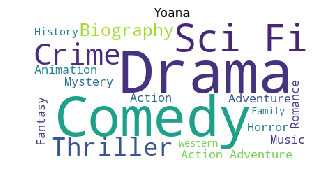

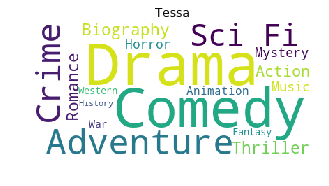

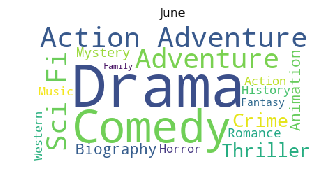

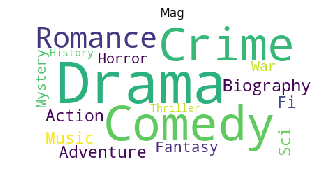

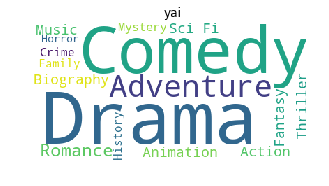

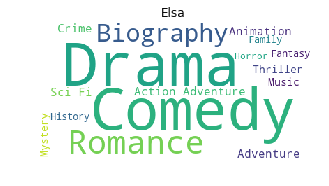

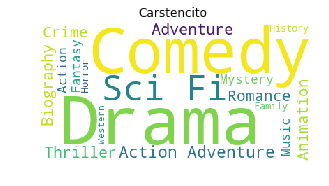

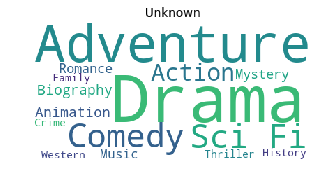

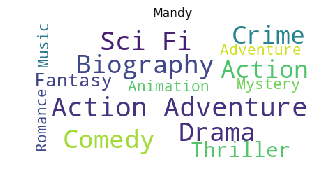

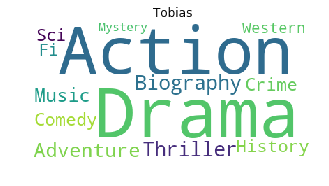

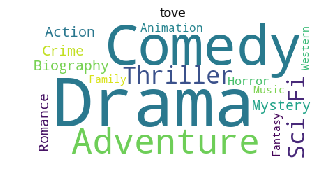

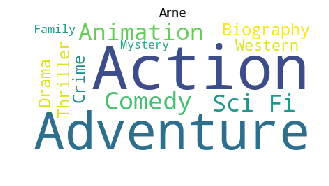

In [17]:
for i in range(len(users)):
    s = get_string(rating_x_genres[rating_x_genres["userId"].eq(users[i])])
    plot_wordscloud(s, users[i])

In [18]:
z = s.replace("Drama","")

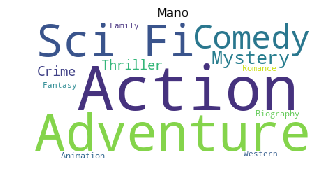

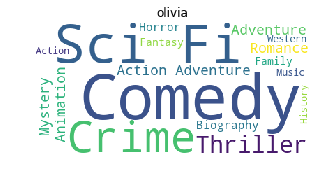

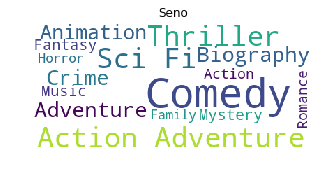

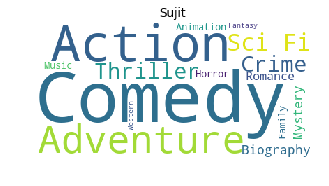

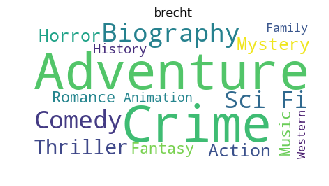

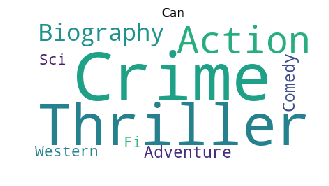

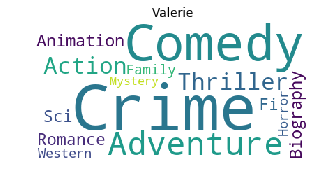

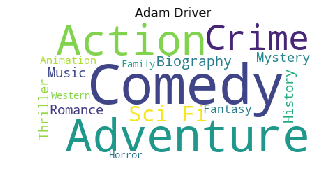

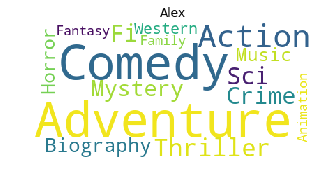

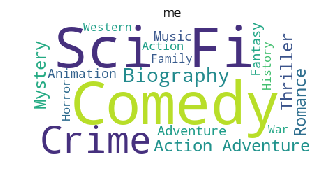

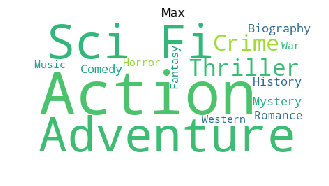

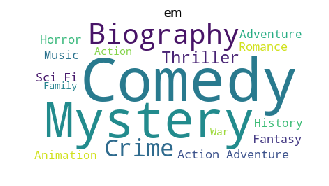

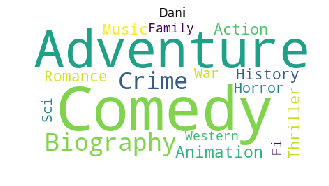

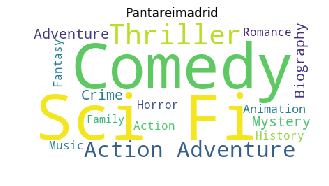

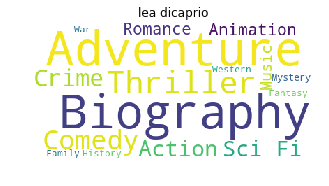

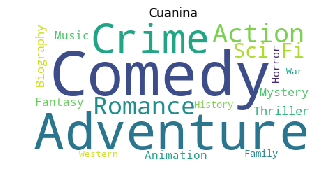

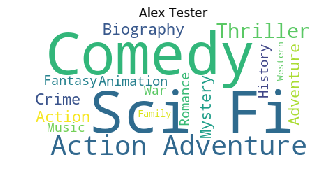

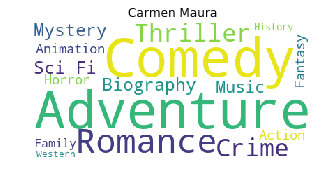

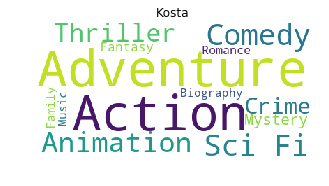

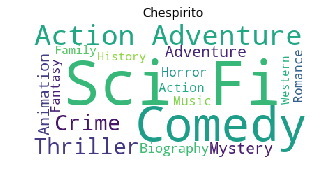

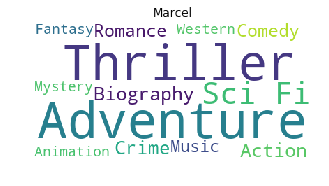

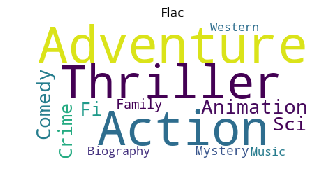

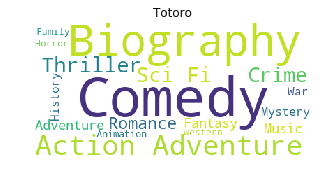

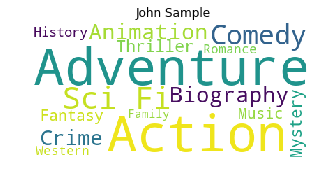

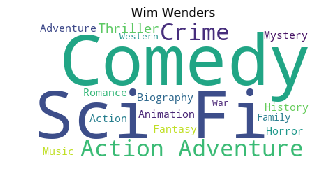

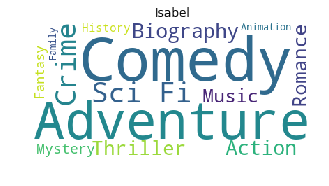

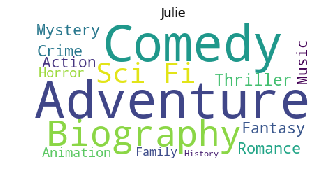

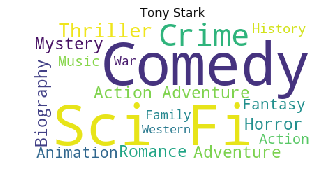

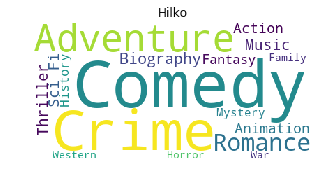

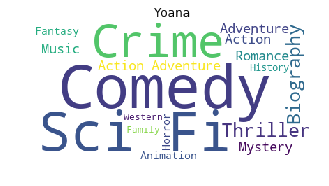

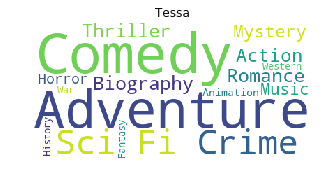

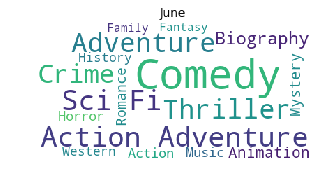

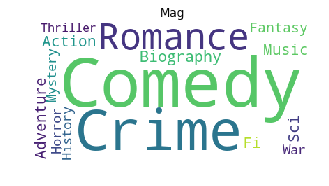

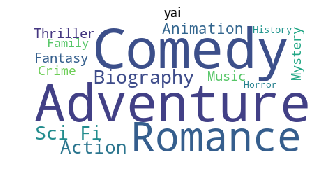

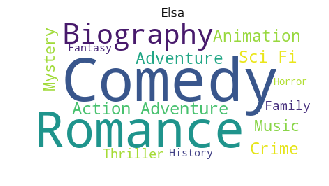

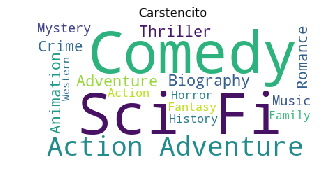

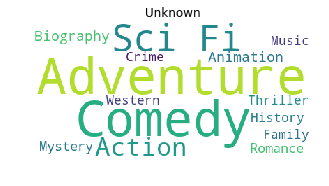

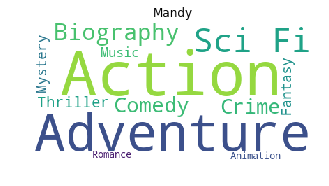

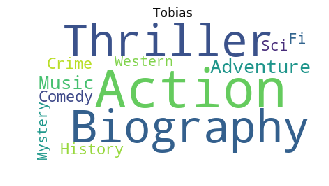

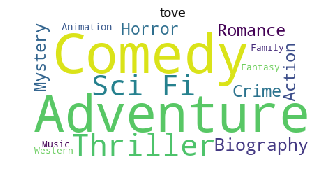

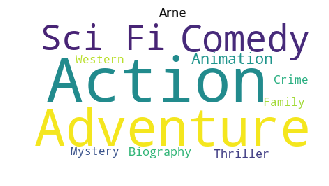

In [19]:
# plot wordcloud without "Drama"
for j in range(len(users)):
    z = get_string(rating_x_genres[rating_x_genres["userId"].eq(users[j])])
    z = z.replace("Drama","")
    plot_wordscloud(z, users[j])